In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import keras

# from keras import regularizers
# from keras.utils import load_img
# from PIL import Image

In [4]:
data_dir = '/Users/marta/Documents/data_dir/'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(256, 256),
  batch_size = 32)

Found 14633 files belonging to 2 classes.
Using 11707 files for training.
Found 14633 files belonging to 2 classes.
Using 2926 files for validation.


2024-06-10 14:15:24.430746: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [11707]
	 [[{{node Placeholder/_0}}]]
2024-06-10 14:15:24.431187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [11707]
	 [[{{node Placeholder/_4}}]]
2024-06-10 14:15:24.464601: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


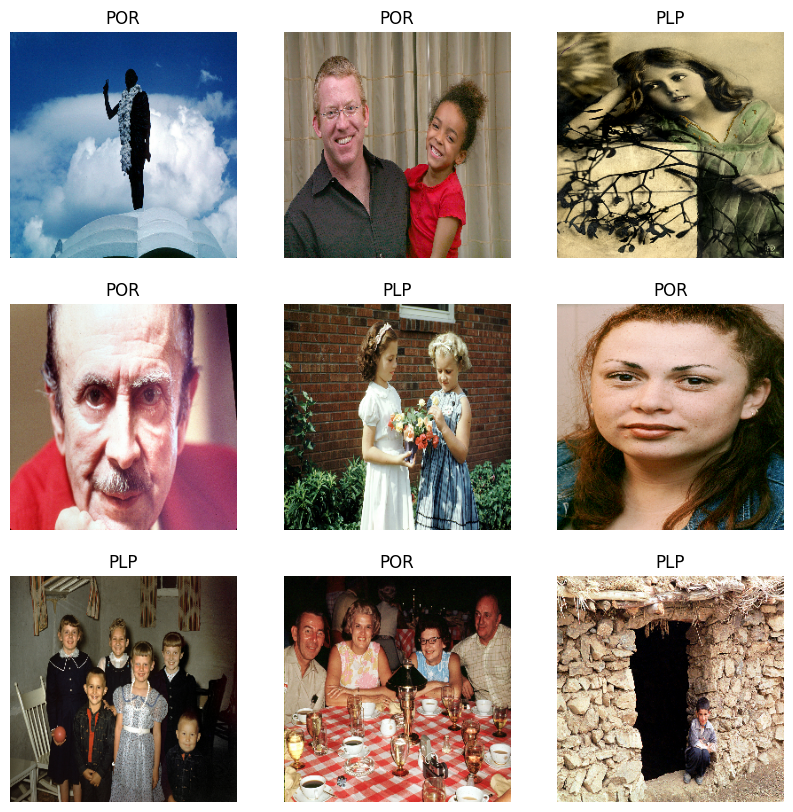

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
class_names = train_ds.class_names
print(class_names)

['PLP', 'POR']


In [9]:
# CNN 1: input layer + 1 hidden layer
cnn_new = Sequential()

# Convoluting and MaxPooling
# input (which includes one hidden layer because Sequential does that)
cnn_new.add(Conv2D(512,
                2,
                activation = 'relu',
                input_shape = (256, 256, 3)))
cnn_new.add(MaxPooling2D(2))

# add our first explicit hidden layer
cnn_new.add(Conv2D(64, 2, activation = 'relu'))
cnn_new.add(MaxPooling2D(2))

# Output layer, with softmax activation because it's classification
# with as many neurons as there are classes
cnn_new.add(Flatten())
cnn_new.add(Dense(1, activation = 'sigmoid'))

# compiling the model
cnn_new.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['acc']
)

In [10]:
# Fit the model
history = cnn_new.fit(train_ds,
                   epochs = 10,
                   validation_data = val_ds)

Epoch 1/10


2024-06-10 14:19:22.207351: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [11707]
	 [[{{node Placeholder/_0}}]]
2024-06-10 14:19:22.207667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [11707]
	 [[{{node Placeholder/_4}}]]


366/366 [==============================] - ETA: 0s - loss: 3.2916 - acc: 0.6242

2024-06-10 14:49:14.815140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2926]
	 [[{{node Placeholder/_4}}]]
2024-06-10 14:49:14.815284: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2926]
	 [[{{node Placeholder/_0}}]]


366/366 [==============================] - 1853s 5s/step - loss: 3.2916 - acc: 0.6242 - val_loss: 0.6738 - val_acc: 0.6169
Epoch 2/10
366/366 [==============================] - 1935s 5s/step - loss: 0.6506 - acc: 0.6335 - val_loss: 0.6924 - val_acc: 0.6066
Epoch 3/10
366/366 [==============================] - 1876s 5s/step - loss: 0.6013 - acc: 0.6598 - val_loss: 0.8887 - val_acc: 0.5827
Epoch 4/10
366/366 [==============================] - 1903s 5s/step - loss: 0.5649 - acc: 0.6804 - val_loss: 1.0385 - val_acc: 0.5670
Epoch 5/10
366/366 [==============================] - 1615s 4s/step - loss: 0.5380 - acc: 0.6960 - val_loss: 1.3238 - val_acc: 0.5646
Epoch 6/10
366/366 [==============================] - 1494s 4s/step - loss: 0.5229 - acc: 0.7062 - val_loss: 1.4232 - val_acc: 0.5636
Epoch 7/10
366/366 [==============================] - 1512s 4s/step - loss: 0.5065 - acc: 0.7153 - val_loss: 1.2565 - val_acc: 0.5615
Epoch 8/10
366/366 [==============================] - 1575s 4s/step - los

NameError: name 'history' is not defined

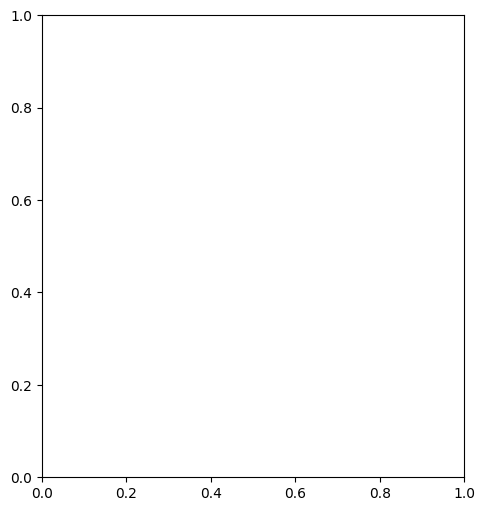

In [6]:
# Check out the plot of loss vs epoch.
plt.figure(figsize = (12, 6));

plt.subplot(1,2,1)
plt.plot(history.history['loss'], c = 'navy', label = 'Training Loss');
plt.plot(history.history['val_loss'], c = 'orange', label = 'Testing Loss');

plt.title('''CNN 1 :
Binary Crossentropy (loss function),
as a Function of Epochs''')
plt.xlabel('Epochs');
plt.ylabel('Loss Function')
plt.legend();


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], c = 'navy', label = 'Training Accuracy');
plt.plot(history.history['val_acc'], c = 'orange', label = 'Testing Accuracy');
plt.title('''CNN 1: 
Accuracy Score 
as a Function of Epochs)''')
plt.xlabel('Epochs');
plt.ylabel('Accuracy Score')
plt.legend();

# Saving Figure to Images Folder
plt.savefig('../images_and_graphs/cnn1_loss_accuracy_plots')